### Esse programa está explicado nos seguintes vídeos do YouTube:

In [2]:
from IPython.display import YouTubeVideo

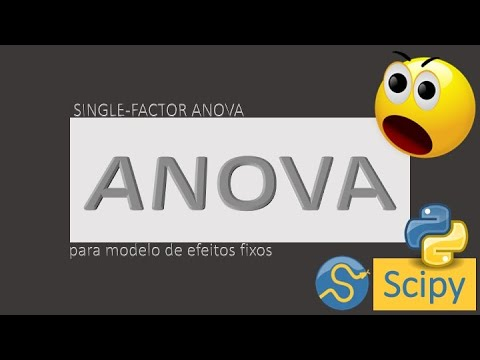

In [3]:
YouTubeVideo('qRK33gjYpx0', width=800, height=300)

In [4]:
YouTubeVideo('kwXyCh4iMQo', width=800, height=300)

Importação de bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_excel('tabela1.xlsx')

In [3]:
dados

,Comp,Rep.1,Rep.2,Rep.3,Rep.4,Rep.5
0,NaN,1,2,3,4,5
1,15.0,7,7,15,11,9
2,20.0,12,17,12,18,18
3,25.0,14,18,18,19,19
4,30.0,19,25,22,19,23
5,35.0,7,10,11,15,11


In [4]:
dados = dados.drop(dados.index[0])

In [5]:
dados

,Comp,Rep.1,Rep.2,Rep.3,Rep.4,Rep.5
1,15.0,7,7,15,11,9
2,20.0,12,17,12,18,18
3,25.0,14,18,18,19,19
4,30.0,19,25,22,19,23
5,35.0,7,10,11,15,11


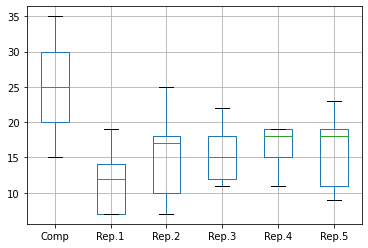

In [6]:
dados.boxplot()

In [7]:
dados['Comp']

1    15.0
2    20.0
3    25.0
4    30.0
5    35.0
Name: Comp, dtype: float64

In [8]:
dados.set_index(dados['Comp'])

,Comp,Rep.1,Rep.2,Rep.3,Rep.4,Rep.5
Comp,,,,,,
15.0,15.0,7,7,15,11,9
20.0,20.0,12,17,12,18,18
25.0,25.0,14,18,18,19,19
30.0,30.0,19,25,22,19,23
35.0,35.0,7,10,11,15,11


In [9]:
dados = dados.set_index(dados['Comp'])

In [10]:
dados

,Comp,Rep.1,Rep.2,Rep.3,Rep.4,Rep.5
Comp,,,,,,
15.0,15.0,7,7,15,11,9
20.0,20.0,12,17,12,18,18
25.0,25.0,14,18,18,19,19
30.0,30.0,19,25,22,19,23
35.0,35.0,7,10,11,15,11


In [11]:
dados = dados.drop('Comp', axis = 1)

In [12]:
dados

,Rep.1,Rep.2,Rep.3,Rep.4,Rep.5
Comp,,,,,
15.0,7,7,15,11,9
20.0,12,17,12,18,18
25.0,14,18,18,19,19
30.0,19,25,22,19,23
35.0,7,10,11,15,11


In [13]:
d = dados.T

In [14]:
d

Comp,15.0,20.0,25.0,30.0,35.0
Rep.1,7,12,14,19,7
Rep.2,7,17,18,25,10
Rep.3,15,12,18,22,11
Rep.4,11,18,19,19,15
Rep.5,9,18,19,23,11


In [15]:
d.columns

Float64Index([15.0, 20.0, 25.0, 30.0, 35.0], dtype='float64', name='Comp')

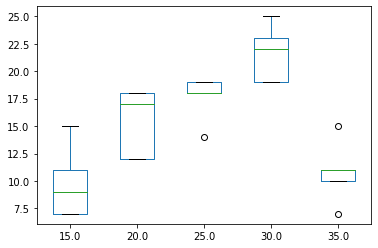

In [16]:
d.boxplot(column=[15.0, 20.0, 25.0, 30.0, 35.0],grid = False )

In [17]:
import scipy.stats as stats

In [18]:
Fvalor,pvalor = stats.f_oneway(d[15],d[20],d[25],d[30],d[35])

In [19]:
Fvalor

14.756823821339955

In [20]:
pvalor

9.127937124058432e-06

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
d_novo = pd.melt(d.reset_index(),id_vars=['index'],
                value_vars = [15.0, 20.0, 25.0, 30.0, 35.0])

In [23]:
d

Comp,15.0,20.0,25.0,30.0,35.0
Rep.1,7,12,14,19,7
Rep.2,7,17,18,25,10
Rep.3,15,12,18,22,11
Rep.4,11,18,19,19,15
Rep.5,9,18,19,23,11


In [24]:
d_novo.head()

,index,Comp,value
0,Rep.1,15,7
1,Rep.2,15,7
2,Rep.3,15,15
3,Rep.4,15,11
4,Rep.5,15,9


In [25]:
d_novo.columns = ['indice','tratamento', 'valor']

In [26]:
d_novo.head()

,indice,tratamento,valor
0,Rep.1,15,7
1,Rep.2,15,7
2,Rep.3,15,15
3,Rep.4,15,11
4,Rep.5,15,9


In [27]:
model = ols('valor ~ C(tratamento)',data = d_novo).fit()

In [28]:
model

In [29]:
anova_tabela = sm.stats.anova_lm(model,typ = 2)

In [30]:
anova_tabela

,sum_sq,df,F,PR(>F)
C(tratamento),475.76,4.0,14.756824,0.000009
Residual,161.20,20.0,NaN,NaN


In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [32]:
m_comp = pairwise_tukeyhsd(endog = d_novo['valor'],
                          groups = d_novo['tratamento'],
                          alpha = 0.01)

In [33]:
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  15.0   20.0      5.6 0.0385  -1.1211 12.3211  False
  15.0   25.0      7.8 0.0026   1.0789 14.5211   True
  15.0   30.0     11.8  0.001   5.0789 18.5211   True
  15.0   35.0      1.0    0.9  -5.7211  7.7211  False
  20.0   25.0      2.2 0.7148  -4.5211  8.9211  False
  20.0   30.0      6.2 0.0189  -0.5211 12.9211  False
  20.0   35.0     -4.6 0.1165 -11.3211  2.1211  False
  25.0   30.0      4.0 0.2102  -2.7211 10.7211  False
  25.0   35.0     -6.8 0.0091 -13.5211 -0.0789   True
  30.0   35.0    -10.8  0.001 -17.5211 -4.0789   True
-----------------------------------------------------


In [34]:
anova_tabela = sm.stats.anova_lm(model)

In [35]:
anova_tabela

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamento),4.0,475.76,118.94,14.756824,0.000009
Residual,20.0,161.20,8.06,NaN,NaN


In [36]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:                  valor   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     14.76
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           9.13e-06
Time:                        15:02:07   Log-Likelihood:                -58.771
No. Observations:                  25   AIC:                             127.5
Df Residuals:                      20   BIC:                             133.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.80

In [38]:
model.rsquared

0.7469228836975634

In [39]:
model.params

Intercept                 9.8
C(tratamento)[T.20.0]     5.6
C(tratamento)[T.25.0]     7.8
C(tratamento)[T.30.0]    11.8
C(tratamento)[T.35.0]     1.0
dtype: float64

In [40]:
model.params[0]

9.799999999999997

In [41]:
model.params[3]

11.800000000000002

In [42]:
pred_val = model.fittedvalues.copy()

In [43]:
pred_val

0      9.8
1      9.8
2      9.8
3      9.8
4      9.8
5     15.4
6     15.4
7     15.4
8     15.4
9     15.4
10    17.6
11    17.6
12    17.6
13    17.6
14    17.6
15    21.6
16    21.6
17    21.6
18    21.6
19    21.6
20    10.8
21    10.8
22    10.8
23    10.8
24    10.8
dtype: float64

In [44]:
true_val = d_novo['valor'].values.copy()

In [45]:
true_val

array([ 7,  7, 15, 11,  9, 12, 17, 12, 18, 18, 14, 18, 18, 19, 19, 19, 25,
       22, 19, 23,  7, 10, 11, 15, 11])

In [46]:
resid = true_val - pred_val

In [47]:
resid

0    -2.8
1    -2.8
2     5.2
3     1.2
4    -0.8
5    -3.4
6     1.6
7    -3.4
8     2.6
9     2.6
10   -3.6
11    0.4
12    0.4
13    1.4
14    1.4
15   -2.6
16    3.4
17    0.4
18   -2.6
19    1.4
20   -3.8
21   -0.8
22    0.2
23    4.2
24    0.2
dtype: float64

In [48]:
import scipy as sp

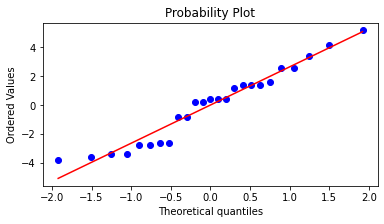

In [50]:
fig,ax = plt.subplots(figsize = (6,3))
_,(_,__,r) = sp.stats.probplot(resid,plot = ax, fit = True)
plt.show()

In [51]:
r**2

0.9563591185635382

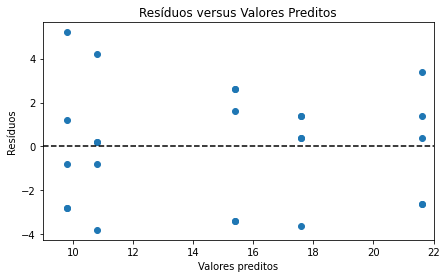

In [52]:
fig, ax = plt.subplots(figsize = (7,4))
ax.scatter(pred_val,resid)
ax.plot([9,22],[0,0],'k--')
plt.title('Resíduos versus Valores Preditos')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.xlim(9,22)
plt.show()

In [53]:
model.fittedvalues

0      9.8
1      9.8
2      9.8
3      9.8
4      9.8
5     15.4
6     15.4
7     15.4
8     15.4
9     15.4
10    17.6
11    17.6
12    17.6
13    17.6
14    17.6
15    21.6
16    21.6
17    21.6
18    21.6
19    21.6
20    10.8
21    10.8
22    10.8
23    10.8
24    10.8
dtype: float64

In [56]:
resid

0    -2.8
1    -2.8
2     5.2
3     1.2
4    -0.8
5    -3.4
6     1.6
7    -3.4
8     2.6
9     2.6
10   -3.6
11    0.4
12    0.4
13    1.4
14    1.4
15   -2.6
16    3.4
17    0.4
18   -2.6
19    1.4
20   -3.8
21   -0.8
22    0.2
23    4.2
24    0.2
dtype: float64

In [57]:
model.resid

0    -2.8
1    -2.8
2     5.2
3     1.2
4    -0.8
5    -3.4
6     1.6
7    -3.4
8     2.6
9     2.6
10   -3.6
11    0.4
12    0.4
13    1.4
14    1.4
15   -2.6
16    3.4
17    0.4
18   -2.6
19    1.4
20   -3.8
21   -0.8
22    0.2
23    4.2
24    0.2
dtype: float64

In [58]:
for attr in dir(model):
    if not attr.startswith('_'):
        print(attr)

HC0_se
HC1_se
HC2_se
HC3_se
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summary2
t_test
t_test_pairwise
tvalues
uncentered_tss
use_t
wald_test
wald_test_terms
wresid
